
## Parte 1- Carga del Dataset

### **Introducción**
Este proyecto explora principalmente la relación existente entre la calidad del vino y las variables fisicoquímicas y sensoriales del mismo (como por ejemplo la ácidez, el pH, y el alcohol). El objetivo principal es análizar cuales de estas variables hacen que un vino sea considerado bueno.

Para el desarrollo del proyecto se ha utilizado el Dataset (winequalityX2.csv) sobre diferentes muestras de vino. Este dataset ha sido obtenido de la página https://www.kaggle.com/, con própositos de aprendizaje, y consta de 1599 filas y 12 columnas de atributos physicoquímicos (Ej: pH) y sensoriales (calidad percibida). Los valores de calidad de este dataset están basados en la media de al menos 3 evaluaciones hechas por expertos, donde cada experto calificó la calidad del vino entre 0 (muy malo) y 10 (excelente). 

A continuación se muestran las variables de los que consta nuestro dataset:
1.     fixed acidity
2.     volatile acidity
3.     citric acid
4.     residual sugar
5.     chlorides
6.     free sulfur dioxide
7.     total sulfur dioxide
8.     density
9.     pH
10.   sulphates
11.   alcohol
12.   quality (calificación entre 0 y 10 basada en la percepción sensorial de los usuarios) 

Para la exploración y el análisis de los datos se utilizó gráficos (como seaborn y ggplot), y varios algoritmos de aprendizaje automático para determinar qué propiedades fisicoquímicas poseen un mayor impacto en la calidad de un vino.

####**Entorno de Desarrollo**

El entorno de trabajo para el desarrollo del código y la elaboración del proyecto ha sido la plataforma Google Colaboratory, no obstante; el correcto funcionamiento del código también se ha validado en el entorno de la máquina virtual facilitada por la escuela Kschool (Jupyter Notebook).

Los notebooks subidos serán los validados desde la máquina virtual, no obstante, se dejará comentado el código utilizado en la fase de desarrollo desde la plataforma google colaboratory.






In [201]:
# Instalando librerias
!pip install seaborn --upgrade catplot

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)
Requirement already up-to-date: catplot in /usr/local/lib/python3.6/dist-packages (1.3.3)


In [0]:
# Cargando otras librerias
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# Autenticación y autorización en google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
# Carga del Fichero desde GoogleDrive
file_id = '14dMLG12VMVRQodfEJ5iQz7tgBPYzOQJP'    
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("winequalityX2.csv")  

In [205]:
!ls

adc.json  sample_data  winequalityX2.csv  winequalityX.csv


In [206]:
# Carga del Dataset winequalityX2.csv
wineX = pd.read_csv('winequalityX2.csv')

# Obtenemos una muestra de 20 registros
wineX.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Comentario:** Tras la fase de carga del Dataset, nos encontramos con una serie de datos numéricos y categóricos. Vamos a realizar una serie de comprobaciones sencillas como es la integridad de los datos para ver si hay valores nulos o NaN

In [207]:
# Comprobamos el número de filas y columnas
wineX.shape

(1599, 12)

In [208]:
# Comprobamos la estructura del Data Set y que no haya ningún valor nulo 
# dentro del Dataset
wineX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [209]:
#Obtenemos la descripción de los campos de las columnas
wineX.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

En total, tenemos 12 características numéricas. La variable objetivo es el 'quality' (Calidad del vino), que puede ser buena o mala según el valor que tenga del 0 al 10.


In [210]:
#Revisamos los valores NA para cada columna
wineX.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No se han encontrado valores de NaN en nuestro dataset.


**Comentario**: El Dataset que seguiremos utilizando en los tratamientos de la parte 2 del proyecto será el "winequalityX2.csv".


## Parte 2- Exploración y Análisis de Datos

### **Introducción**:

En esta parte segunda parte, se realizarán las modificaciones necesarias al dataset para adaptarlo a las necesidades del proyecto.






**Términos Enológicos como variables del dataset y su significado: **

   **Fixed Acidity (Ácidez Fija):** Es el conjunto de ácidos naturales procedentes de la uva (tartárico, málico, cítrico y succínico) o formados en la fermentación maloláctica (láctico). En general, los ácidos (acidez fija) son preservantes naturales del vino y ayudan a mantener el color y las cualidades aromáticas del mismo.

   **Volatile Acidity (Ácidez Volátil):** Es el conjunto de ácidos formados durante la fermentación o como consecuencia de alteraciones microbianas; su valor es un índice de la degradación del vino. Estos ácidos son: ácido acético, ácido propionico, ácido butírico y ácido sulfúrico; no obstante el más importante es el ácido acético, síntoma de la transformación del vino en vinagre. 
    Si la acidez volátil, presente en todos los vinos, es muy elevada el vino se picará y avigranará con el paso del tiempo. Es conveniente que la acidez volátil de un vino sea lo más baja posible.
    El contenido en ácidez volátil no puede ser superior a: a) 18 miliequivalentes por litro para los mostos de uva parcialmente fermentados, b) 18 miliequivalentes por litro para los vinos blancos y rosados, c) 20 miliequivalentes por litro para los vinos tintos.

   **Citric Acid (Ácido Cítrico):** En pequeñas cantidades este ácido puede añadir frescor y sabor a los vinos (es un ácido fijo).

   **Residual Sugar (Azúcar Residual):** Durante la fermentación, y por acción de las levaduras, el azucar (glucosa + fructosa) se transforma en alcohol etílico, anhídrido carbónico y otras muchas sustancias que caracterizan al vino. Cuando la fermentación es prácticamente total se dice que el vino es seco, pero lo normal es que en todo vino quede cierta cantidad de azúcares sin fermentar, denominados azúcares residuales. 
    
   **Chlorides (Cloruros):** Cantidad de sal en el vino.

   **Free Sulfur Dioxide (Dióxido de Azúfre Libre):** El SO2 es una herramienta indispensable en la elaboración y conservación de vinos. Una correcta utilización del SO2 permite obtener vinos menos oxidados, dotados de un mejor color y aroma, y una menor acidez volátil, debido a sus efectos como:
   
   →Antioxidante: posee propiedades reductoras, acaparando oxígeno e impidiendo la oxidación.
   →Antioxidásico: Destruye las oxidasas evitando quiebras.
   →Antimicrobiano: Ejerce una actividad inhibidora sobre levaduras, bacterias lácticas y bacterias acéticas. 
 
 Es también conocido como anhídrido sulfuroso o como óxido de azufre.

   **Total Sulfur Dioxide (Dióxido de Azúfre Total):** Suma de concentraciones libres y amarradas de S02; concentraciones de dioxodo de sulfuro libres superiores a 50 ppm se vuelven evidentes en el sabor y olor.

   **Density (Densidad):** densidad del vino, suele ser similar al del agua dependiendo de la concentración de azucar y de alcohol.

   **pH:** Describe cómo de ácido o básico es el vino: 0 (muy ácido) a 14 (muy básico). La mayoría de vinos se encuentra en la escala 3-4.

   **Sulphates (Sulfatos):** Actua como un antimicrobial y antioxidante. Un agua con una cantidad de sulfatos inferior a 250mg/l se considera en este aspecto un agua de calidad y con valores superiores a 400mg/l insalubre.

   **Alcohol:** cantidad de alcohol del vino. Tras el agua, es el componente más abundante en el vino y el que lo caracteriza. Se produce por la transformación de los azúcares del mosto durante la fermentación. La riqueza alcohólica de un vino se mide en porcentaje en volumen o grado y en la etiqueta se expresa con la fórmula % vol. Significa que un vino de 12 grados (12%vol) contiene un 12% de alcohol puro.

   **Quality (Calidad):** calidad del vino entre 0 y 10 catada por lo usuarios.



**Comentario:** Con el objetivo de poder realizar una mejor comprensión en la fase de análisis, se modificarán los nombres de las columnas para adaptarlas a la terminología española.

In [0]:
# Renombramos los nombres de las columnas para adaptarlas 
# a los términos enológicos en español

wineX.rename(columns=
 {'type':'Tipo','fixed acidity':'Acidez_Fija', 
  'volatile acidity':'Acidez_Volatil','citric acid':'Acido_Citrico',
  'residual sugar':'Azucar_Residual','chlorides':'Sal',
  'free sulfur dioxide':'Dioxido_Azufre_Libre','total sulfur dioxide':'Dioxido_Azufre_Total',
  'density':'Densidad',
  'pH':'pH','sulphates':'Sulfatos',
  'alcohol':'Alcohol','quality':'Calidad'}, inplace=True)

In [212]:
# Comprobamos los cambios realizados
wineX.head(20)

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Azufre_Libre,Dioxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [213]:
# Obtenemos un resumen estadistico
wineX.describe()
# El 50% del cuantil es en realidad la mediana del conjunto de datos

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Azufre_Libre,Dioxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Comentarios:** Si miramos los datos obtenidos, podemos notar que:

- El valor promedio es mayor que el valor de la mediana (50%) para casi todas las columnas.
- Existente una diferencia notoriamente grande entre el 75% y el valor máximo para las columnas como: Azúcar_Residual, Sal, Dioxido_Sulfuro_Libres, y Dioxido_Sulfuro_Total.
- Las observaciones anteriores sugieren que existen valores extremos (outliers) en nuestro conjunto de datos. 

## Análisis general de todas las variables

Graficaremos algunas variables para observar mejor como están distribuidas y relacionadas entre sí.


In [0]:
# Librerias a emplear
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

**Calidad:**

In [215]:
# Posibles valores que tiene la columna 'Calidad' 
wineX['Calidad'].unique()

array([5, 6, 7, 4, 8, 3])

In [216]:
# Observamos la manera en la que están agrupados
wineX.Calidad.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Calidad, dtype: int64

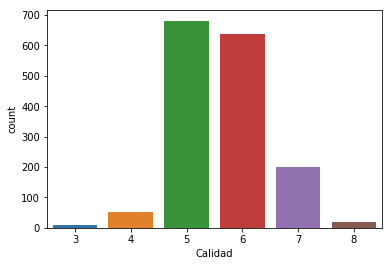

In [217]:
#Graficamos para ver mejor como es la distribución
sns.countplot(wineX['Calidad'])

**Comentarios:** Podemos ver que
- La variable dependiente 'Calidad' es discreta y de naturaleza categórica (varían de 3 a 8, donde 3 es malo y 8 es bueno).
- Se observa una calificación de calidad entre 3 y 8, es decir; los grados de calidad 1, 2, 9 y 10 no aparecen en el dataset.
- La mayor concentración de la calificación de calidad se concentra de 5 y 6, y la menor se concentra en las puntuaciones de 3 y 8. Las clases están ordenadas pero no están equilibradas (por ejemplo, hay más vinos normales que excelentes o pobres).
- Dado que la distribución de las muestras para los diferentes valores de calidad no es uniforme, se podría utilizar algún algoritmo de detección de 'Outliers' y retirarlos de nuestro dataset, o no eliminar ningún valor pero sí tenerlo en cuenta al dividir el conjunto de datos de entrenamiento y de validación.
- En este caso no eliminaremos los outliers, dado a que la creación de un vino es meramente una reacción química, y los valores extremos que se presentan son posibles. Podríamos pensar que dichos outliers pertenecen a vinos que tienen características muy diferentes al resto.

A continuación representaremos cada una de las otras columnas contra la variable objetivo "Calidad", para posteriormente analizar y obtener las primeras conclusiones:

**Ácidez Fija vs Calidad:**

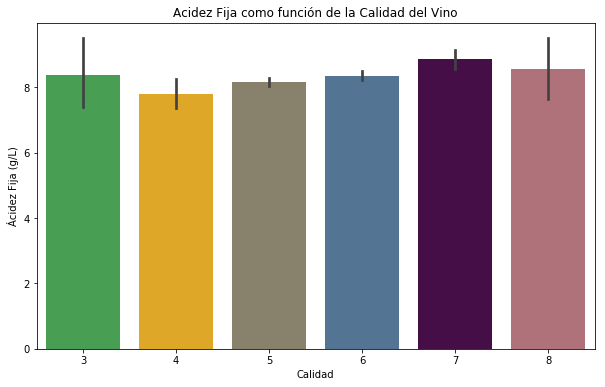

In [218]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img1 = plt.figure(figsize = (10,6))
sns.barplot(x='Calidad', y='Acidez_Fija', data=wineX, palette=colors)
plt.title("Acidez Fija como función de la Calidad del Vino")
plt.ylabel("Ácidez Fija (g/L)")
plt.show()
   

**Comentarios:** Vemos que la ácidez fija no es de gran aporte para clasificar la calidad. Al principio la gráfica muestra una leve tendencia decreciente, pero vemos que vuelve a subir a mayor calidad (9).


**Ácidez Volátil vs Calidad:**

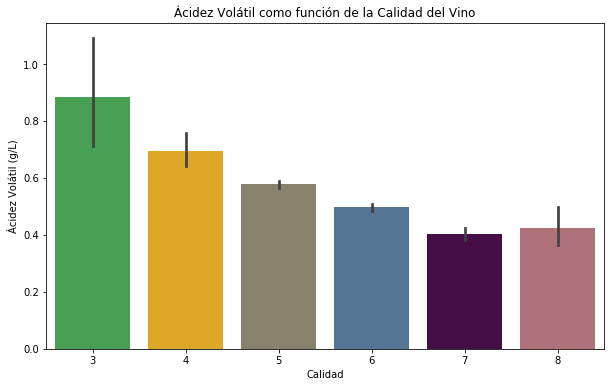

In [219]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Acidez_Volatil', data = wineX, palette=colors)
plt.title("Ácidez Volátil como función de la Calidad del Vino")
plt.ylabel("Ácidez Volátil (g/L)")
plt.show()

**Comentarios:** Se observa una tendencia decreciente en la ácidez volátil a medida que aumentamos la calidad.

Este resultado era de esperarse en vinos de buena calidad, ya que un aumento de este parámetro tendría un efecto negativo y provocaría el picado acético; que a la hora de catar terminaríamos por percibir aromas y sabores a vinagre. 

La ácidez volátil es fácilmente perceptible a partir de los 0,8 g/L o los 0,9 g/L, según la sensibilidad del catador.

**Ácido Cítrico vs Calidad:**

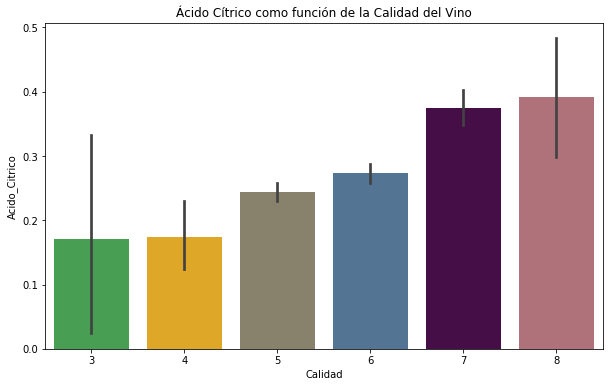

In [220]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img3 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Acido_Citrico', data = wineX, palette=colors)
plt.title("Ácido Cítrico como función de la Calidad del Vino")
plt.show()


**Comentarios**: La composición del ácido cítrico parece aumentar a medida que avanzamos en la calidad del vino.

**Azúcar Residual vs Calidad: **

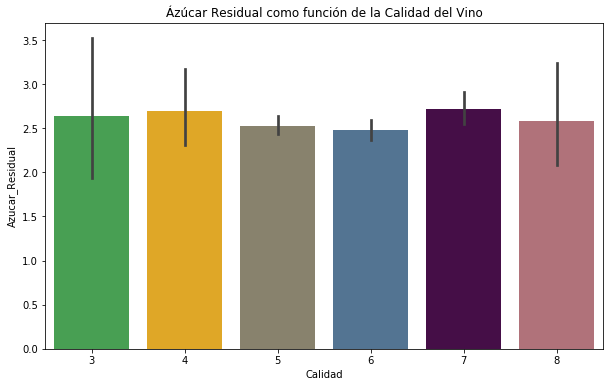

In [221]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img4 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Azucar_Residual', data = wineX, palette=colors)
plt.title("Ázúcar Residual como función de la Calidad del Vino")
plt.show()

**Comentarios:** Vemos que la Azúcar Residual parece no dar ninguna especificación para clasificar la calidad.

**Cloruro vs Calidad:**

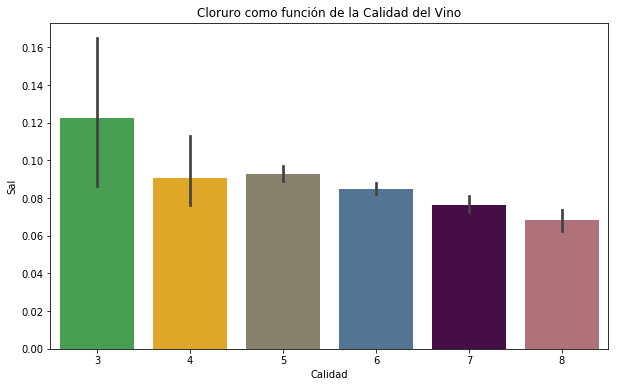

In [222]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img5 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Sal', data = wineX, palette=colors)
plt.title("Cloruro como función de la Calidad del Vino")
plt.show()

**Comentarios**: La composición del cloruro (sal) también disminuye a medida que avanzamos en la calidad del vino.

**Dióxido Azúfre Libre vs Calidad:**

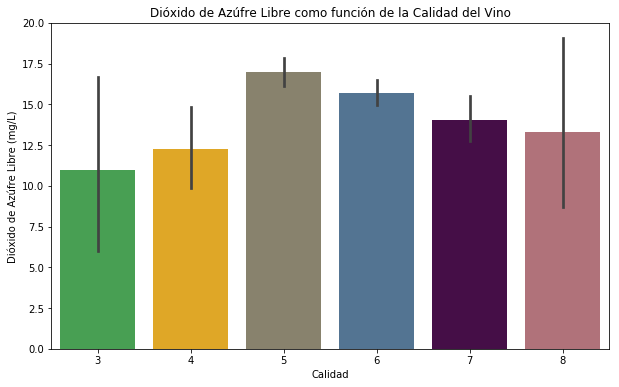

In [225]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img6 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Dioxido_Azufre_Libre', data = wineX, palette=colors)
plt.title("Dióxido de Azúfre Libre como función de la Calidad del Vino")
plt.ylabel("Dióxido de Azúfre Libre (mg/L)")
plt.show()

**Comentarios**: En principio pareciera que el Dióxido de Azúfre Libre (o anhídrido sulfuroso libre) no es de mucho aporte para clasificar la calidad, ya que según nuestro gráfico pueden existir vinos tanto de baja como de alta calidad con elevadas concentraciones de esta sustancia. No obstante, podemos ver que para los vinos de categoría media y superior, este valor pareciera ser más estable, entorno a los 32 - 38mg/L, lo cual es de esperarse sabiendo que en vinos de mayor calidad el uso de esta sustancia es más elevada por su función frente a actividades antibacterianas. 

Esta comprobado que esta sustancia no es nociva para la salud, y que sus propiedades antimicrobianas son 5 a 10 veces mayores que las del SO2 total.

Los niveles de anhídrido sulfuroso libres necesarios para frenar la actividad microbiana, oscilan entre los 10 a 20 mg/litro de SO2, libre para los vinos de pH bajo o de 20 a 40 mg/litro de SO2 libre para los vinos de pH elevado.



**Dióxido de Azúfre Total vs Calidad:**

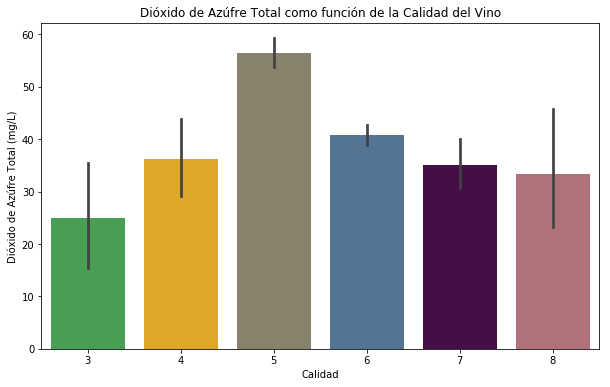

In [226]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img7 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Dioxido_Azufre_Total', data = wineX, palette=colors)
plt.title("Dióxido de Azúfre Total como función de la Calidad del Vino")
plt.ylabel("Dióxido de Azúfre Total (mg/L)")
plt.show()


**Comentarios:** A simple vista vemos que el Dióxido de Azúfre Total pareciera no dar ninguna especificación para clasificar la calidad, no obstante podemos apreciar como en los vinos de más alta calidad, el contenido total de anhídrido sulfuroso en su mayoría no supera los 140mg/L.

La recomendación para el SO2 total no puede superar los 150 mg/l para vinos tintos y los 200 mg/l para vinos blancos y rosados. En dosis muy elevadas puede alterar el aroma y sabor del vino.

In [0]:
# Graficamos la Dióxido de Azúfre Total como función de la calidad y diferenciando por tipo de vino 
# para intentar explicar mejor los resultados de la gráfica anterior

**Densidad vs Calidad:**

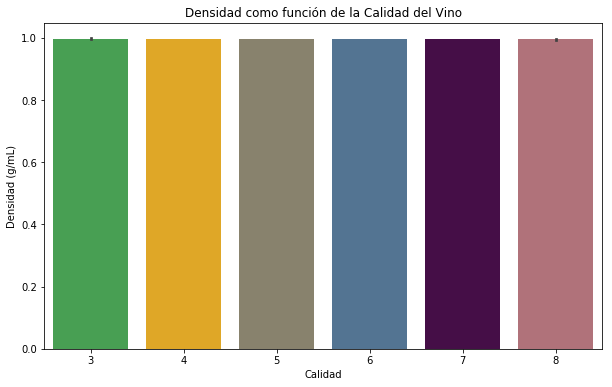

In [227]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img8 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Densidad', data = wineX, palette=colors)
plt.title("Densidad como función de la Calidad del Vino")
plt.ylabel("Densidad (g/mL)")
plt.show()

Text(0, 0.5, 'Densidad (g/mL)')

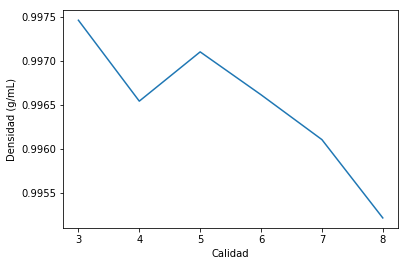

In [228]:
# Usando otro tipo de gráfico
wineX.groupby('Calidad')['Densidad'].mean().plot.line()
plt.ylabel("Densidad (g/mL)")

**Comentarios**: En el gráfico lineal se aprecia mejor como la Densidad tiene una relación inversa con la Calidad. 
Siempre hemos escuchado que la densidad aparente de un vino puede indicarnos su contenido en alcohol, pero sin condicionar su calidad, y por ello es que como criterio de calidad vemos que es importante la densidad, ya que los buenos vinos son aquellos que son ligeros, pero con cuerpo.

Los valores de referencia suelen ser: 
*   Vinos blanco seco: 0,9880 - 0,9930 g/mL.
*   Vinos tinto seco: 0,9910 - 0,9950 g/mL.



In [0]:
# Graficamos la densidad como función de la calidad y diferenciando por tipo de vino 
# para intentar explicar mejor los resultados de la gráfica anterior

**pH vs Calidad:**

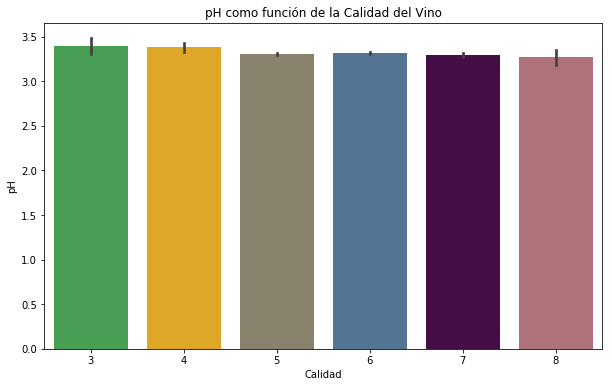

In [231]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img9 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'pH', data = wineX, palette=colors)
plt.title("pH como función de la Calidad del Vino")
plt.show()

Text(0, 0.5, 'pH')

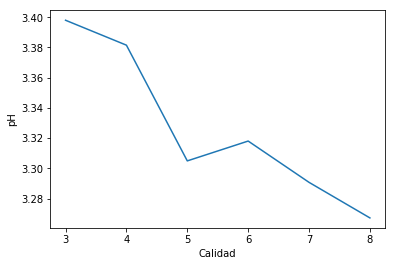

In [232]:
# Usando otro tipo de gráfico
wineX.groupby('Calidad')['pH'].mean().plot.line()
plt.ylabel("pH")

**Comentarios**: El pH es uno de los factores más variables del vino, que resulta del equilibrio de los ácidos que lo componen. Como criterio de calidad es importante porque afecta al sabor del vino, no obstante vemos en nuestra gráfica como los valores suelen estar alrededor de 3.21 y 3.32, siendo levemente más elevado en los vinos de mayor de calidad superior.
Generalmente se busca que el pH de un vino blanco se encuentre en aproximadamente 3.0-3.3 mientras que el pH de un vino tinto entre 3.3 y 3.6.

In [0]:
# Graficamos el pH como función de la calidad y diferenciando por tipo de vino 
# para intentar explicar mejor los resultados de la gráfica anterior


**Sulfatos vs Calidad:**

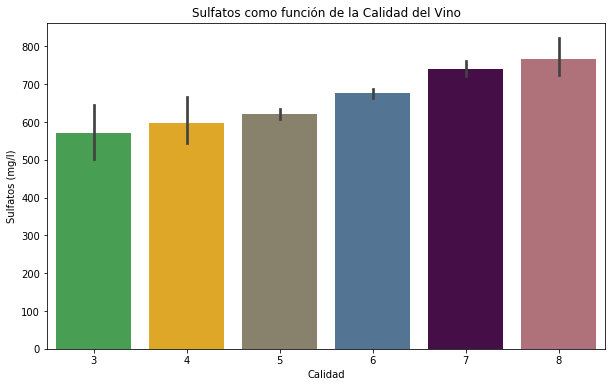

In [233]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]

adapt = wineX['Sulfatos']*1000
img10 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = adapt, data = wineX, palette=colors)
plt.title("Sulfatos como función de la Calidad del Vino")
plt.ylabel("Sulfatos (mg/l)")
plt.show()

**Comentarios**: El nivel de sulfatos es superior en los vinos con calidad media a media-alta. Para los vinos de mayor calidad (9) vemos como las cantidades de sulfato tiene niveles más bajos. 

Recordemos que los sulfatos son las sales derivadas del ácido sulfúrico utilizadas básicamente en fertilizantes, pesticidas, colorantes, jabones, vidrios, papel fármacos, entre otros; y que aparecen en el agua y por lo tanto en la uva. Una alta concentración de los mismos podría hacer que un agua no fuera de calidad alimentaria. 

Un agua con una cantidad de sulfatos inferior a 250mg/l se considera en este aspecto un agua de calidad y con valores superiores a 400mg/l insalubre. Los resultados obtenidos para todas las categorías de calidad estaban por encima de 400mg/l.

**Alcohol vs Calidad: **

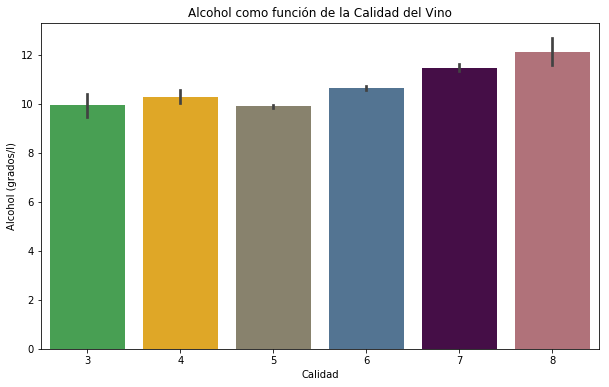

In [234]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]

img11 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Alcohol', data = wineX, palette=colors)
plt.title("Alcohol como función de la Calidad del Vino")
plt.ylabel("Alcohol (grados/l)")
plt.show()

**Comentarios**: Vemos que el nivel de alcohol aumenta a medida que aumenta la calidad del vino. Los valores de graduación para los vinos de mayor calidad (8 y 9) son superiores (entre 12º y 14º), cuatro puntos porcentuales por encima del promedio (10.49º). 


<Figure size 720x72 with 0 Axes>

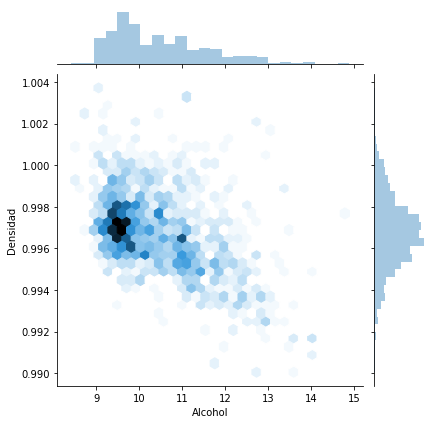

In [235]:
# Graficamos la densidad como función del alcohol para ver mejor su relación
plt.figure(figsize=(10,1))
sns.jointplot(y= 'Densidad', x= 'Alcohol', data = wineX, kind="hex")

**Comentarios:** Como era de esperarse vemos que a mayor grado de alcohol disminuye la densidad del vino, y que la mayoría de los vinos tienen un grado de alcohol entre 9º y 10º con una densidad de mosto 0.9950 g/mL.

### **Mapa de Calor (Correlation Heatmap):**

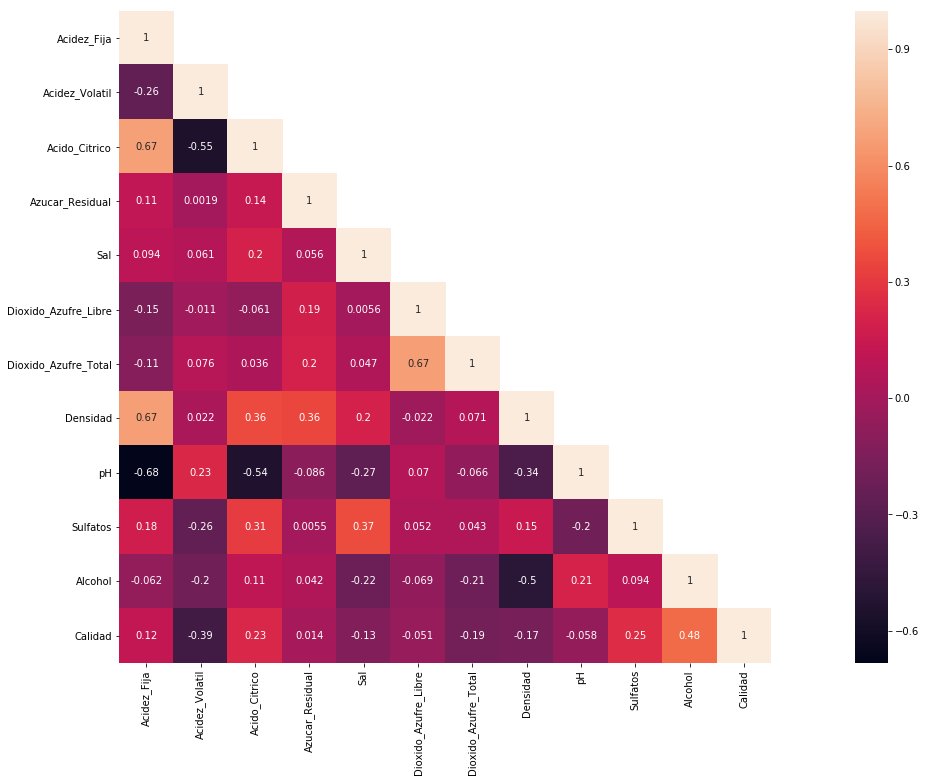

In [236]:
#Pintamos la correlación entre variables
corr_map= wineX.corr()
mask = np.array(corr_map)
mask[np.tril_indices_from(mask)] = False
img=plt.gcf()
img.set_size_inches(30,12)
sns.heatmap(data=corr_map,mask=mask,square=True,annot=True,cbar=True)

**Comentarios:** La gráfica de correlación nos dice es que hay muy pocas características fuertemente correlacionadas entre sí. Desde el punto de vista de incluir estas características en nuestros modelos ML, esto significa que no hay mucha información redundante, y que cada característica lleva consigo información única. No obstante podemos ver que:

- La variable dependiente "Calidad" del vino está altamente relacionada con el "Alcohol". Más que cualquier otra variable, el "Alcohol" es la que más correlacionada con la "Calidad" en un 0.44. Fuertemente relacionadas pero de manera inversa, también tenemos el "Alcohol" y la "Densidad" en -0.69. Por tanto, podemos centrarnos en las relaciones de calidad-alcohol y las relaciones densidad-alcohol para obtener una exploración significativa. 

- Otras relaciones directas que podemos ver con el mapa de calor, son:
       "Dióxido de Sulfuro Total" con "Dióxido de Sulfuro Libres"; 
       "Ácidez Fija" con "Densidad" y "Ácido Cítrico"; 
       "Azúcar Residual" con "Densidad" y "Dióxido de Sulfuro Total"; 

- El pH está altamente relacionado de manera inversa con el "Ácido Cítrico" y la "Ácidez Fija", lo cual se esperaba ya que sabemos que los ácidos tienen valores de pH mucho más pequeños.

- El "Azúcar Residual", el "Dióxido de Sulfuro Total", y la "Ácidez Fija", tienen baja correlacion con la "calidad".

- La auto-relación, es decir, de una característica para sí misma es 1 como se esperaba.

-
-

- Una opción podría ser eliminar algunas características altamente relacionadas, aunque en nuestro caso nos quedaramos con ellas para observar los resultados. 



## Parte 3- Pre-procesado de los Datos para aplicar Algoritmos de Machine Learning


In [0]:
#Librerias a utilizar
from sklearn.preprocessing import LabelEncoder

A continuación realizaremos una clasificación para la variable de respuesta 'Calidad'. Para ello reemplazamos los valores númericos enteros de la columna 'Calidad' por las categorias 'Buena', 'Aceptable' y 'Mala'. Daremos el límite a la calidad basándonos en los valores obtenidos en la parte 2 del proyecto, del promedio y del percentil 25, 50 y 75 para la columna 'Calidad'.

In [238]:
wineX['Calidad'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: Calidad, dtype: float64

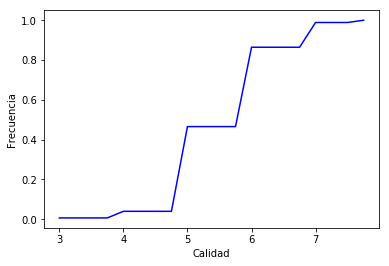

In [239]:
val, base = np.histogram(wineX['Calidad'], bins=20)
Acumulado = np.cumsum(val/wineX.shape[0])
plt.plot(base[:-1], Acumulado, c='blue')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

**Comentario**: Dado que la mediana para la 'Calidad' es 6, y el promedio está entre 5 y 6; clasificaremos el vino como 'Malo' si la calidad es menor o igual a 4, 'Aceptable' si la calidad está entre 5 y 7 incluidos, y mayor o igual a 8 clasificaremos el vino como 'Bueno'. 


In [0]:
# Creamos una nueva variable "Categoria" y 
# categorizamos en ella la variable "Calidad" según los parámetros 
# de calidad que hemos definido

categor = []
for i in wineX['Calidad']:
    if i >= 1 and i <= 4:
        categor.append('1')
    elif i >= 5 and i <= 7:
        categor.append('2')
    else:
        categor.append('3')
wineX['Categoria'] = categor


In [241]:
# Echamos un vistazo para ver como a quedado nuestro dataset
wineX.columns

Index(['Acidez_Fija', 'Acidez_Volatil', 'Acido_Citrico', 'Azucar_Residual',
       'Sal', 'Dioxido_Azufre_Libre', 'Dioxido_Azufre_Total', 'Densidad', 'pH',
       'Sulfatos', 'Alcohol', 'Calidad', 'Categoria'],
      dtype='object')

In [242]:
wineX['Categoria'].unique()

array(['2', '1', '3'], dtype=object)

In [243]:
wineX.Categoria.value_counts()

2    1518
1      63
3      18
Name: Categoria, dtype: int64

### Definición de variables y división de los datos

In [244]:
wineX.head(20)

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Azufre_Libre,Dioxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Categoria
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,2
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,2
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,2
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,2


In [0]:
# Creamos las variables 'x' e 'y', para ello:

# Para 'x', consideramos todas las filas, pero quitamos la columna 'Tipo' 
# y las últimas dos columnas 'Calidad' y 'Categoria'

x = wineX.iloc[:,1:12]  #'x' serán los features
y = wineX['Categoria']  #'y' será la variable objetivo (1=Malo, 2=Aceptable, 3=Bueno)

In [246]:
x.head(10)

,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Azufre_Libre,Dioxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [247]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Categoria, dtype: object

In [0]:
# verificar antes de seguir con los modelos
# x.isna().count

In [0]:
%matplotlib inline

**Datasets para el Training y el Test**

In [0]:
# Dividimos el dataset en 2 partes: 80% para train y 20% para test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Característica de escalado**

Antes de nada, debemos escalar nuestros datos de modo que cada característica tenga una variación de unidades. La biblioteca de scikit proporciona varios tipos de escaladores, incluidos MinMax Scaler y StandardScaler. A continuación, se utilizará el StandardScaler para escalar los datos.


In [290]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [291]:
# comprobamos los features escalados
print(X_test)

[[ 0.24258119 -0.96313679  0.02140418 ...  0.0634928  -0.75508835
   0.39043312]
 [-0.09492307 -0.49458376 -0.6712254  ... -1.15964614 -0.84471308
  -0.84658271]
 [ 0.86133899 -0.23427652  0.17532186 ...  2.23796204 -0.48621416
   0.39043312]
 ...
 [ 0.46758403 -0.07809217 -0.20947235 ... -0.81988533 -0.57583889
  -0.84658271]
 [-1.3886894   0.6507681  -0.36339003 ...  0.26734929  0.67890733
   0.39043312]
 [ 1.39572074 -1.17138258 -0.6712254  ... -0.75193316 -0.66546362
  -2.08359854]]


In [0]:
# Creamos listas vacías para ir guardando los valores obtenidos
# para las métricas en cada modelo a evaluar a continuación
acc={}
prec={}
rec={}
auroc={}

### **Entrenamiento del Modelo y Predicciones sobre el Test Dataset**

Un dato que debemos considerar es que por sí sola la precisión no es una buena opción a la hora de evaluar un modelo. Esto se debe a que, dado que los datos están sesgados, incluso un algoritmo que clasifica el objetivo como el que pertenece a la clase mayoritaria en todo momento logrará una precisión muy alta. Por lo tanto, en este tipo de situaciones conviene también usar otras métricas como:

    Precision: (verdaderos positivos) / (verdaderos positivos + falsos positivos)
    Recall: (verdaderos positivos) / (verdaderos positivos + falsos negativos)
    Accuracy: el resultado armónico de la precision y el recall
    AUC ROC (Curva ROC): es la gráfica entre la precision y el recall

En esta sección, se han usado diferentes modelos de la biblioteca de scikit y los hemos entrenado en los datos previamente escalados y luego se han utilizado para cumplir los propósitos de predicción.


Comenzaremos con el modelo '***Support Vector Machine***' (SVM):

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,confusion_matrix,roc_curve,roc_auc_score

In [296]:
svm = SVC()
svm.fit(X_train,y_train)
predicho_svm =svm.predict(X_test)
print(classification_report(y_test,predicho_svm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.99      1.00      1.00       304
           3       1.00      0.60      0.75         5

   micro avg       0.99      0.99      0.99       320
   macro avg       1.00      0.87      0.92       320
weighted avg       0.99      0.99      0.99       320



In [301]:
svm_cmatrix = confusion_matrix(y_test, predicho_svm)
svm_accuracy = accuracy_score(y_test, predicho_svm)
svm_precision = precision_score(y_test, predicho_svm)
svm_recall = recall_score(y_test, predicho_svm)
svm_auroc = roc_auc_score(y_test, predicho_svm)
print(svm_cmatrix)
print(svm_accuracy*100)
acc.update({'SVM': svm_accuracy*100})
prec.update({'SVM': svm_precision})
rec.update({'SVM': svm_recall})
auroc.update({'SVM': svm_auroc})

[[ 11   0   0]
 [  0 304   0]
 [  0   2   3]]
99.375


Ahora probaremos el modelo '***Random Forest:***':

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [305]:
rclf = RandomForestClassifier(n_estimators=200)
rclf.fit(X_train, y_train)
predicho_rclf = rclf.predict(X_test)
print(classification_report(y_test, predicho_rclf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00       304
           3       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [306]:
rclf_cmatrix = confusion_matrix(y_test, predicho_rclf)
rclf_accuracy = accuracy_score(y_test, predicho_rclf)
print(rclf_cmatrix)
print(rclf_accuracy*100)
acc.update({'Random_Forest_Classifier': rclf_accuracy*100})

[[ 11   0   0]
 [  0 304   0]
 [  0   0   5]]
100.0


Probaremos a continuación el modelo '***Decision Tree Classifier***':




In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
predicho_tree = tree.predict(X_test)
print(classification_report(y_test, predicho_tree))

In [0]:
tree_cmatrix = confusion_matrix(y_test, predicho_tree)
tree_accuracy = accuracy_score(y_test, predicho_tree)
print(tree_cmatrix)
print(tree_accuracy*100)
acc.update({'Decision_Tree_Classifier': tree_accuracy*100})

Ahora probaremos el *** 'K-Nearest Neighbors***' (KNN):

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
kvecinos = KNeighborsClassifier()
kvecinos.fit(X_train,y_train)
predicho_kvecinos=kvecinos.predict(X_test)
print(classification_report(y_test, predicho_kvecinos))

In [0]:
kvecinos_cmatrix = confusion_matrix(y_test, predicho_kvecinos)
kvecinos_accuracy = accuracy_score(y_test, predicho_kvecinos)
print(kvecinos_cmatrix)
print(kvecinos_accuracy*100)
acc.update({'K_Nearest_Neighbors': kvecinos_accuracy*100})

Ahora probaremos con el modelo '***Logistic Regression***':

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
regresion = LogisticRegression()
regresion.fit(X_train, y_train)
predicho_regresion = regresion.predict(X_test)
print(classification_report(y_test, predicho_regresion))

In [0]:
regresion_cmatrix = confusion_matrix(y_test, predicho_regresion)
regresion_accuracy = accuracy_score(y_test, predicho_regresion)
print(regresion_cmatrix)
print(regresion_accuracy*100)
acc.update({'Logistic_Regression': regresion_accuracy*100})

**Comparando los diferentes modelos**

In [0]:
evaluacion_modelo = pd.DataFrame()
evaluacion_modelo['Modelo'] = acc.keys() 
evaluacion_modelo['Accuracy'] = acc.values()
evaluacion_modelo['Precision'] = prec.values()
evaluacion_modelo['Recall'] = rec.values()
evaluacion_modelo['Area_Under_ROC_Curve'] = auroc.values()
evaluacion_modelo

In [0]:
# Comparamos graficando los valores obtenidos de cada métrica y para cada modelo.
# Cargamos la libreria
from matplotlib.pyplot import xticks

In [0]:
fig,ax = plt.subplots(2,2, figsize=(20,20)) 
plt.suptitle("Resultados de los Modelos", fontsize=20)
sns.lineplot(x='Modelo', y='Accuracy',data=evaluacion_modelo, ax = ax[0,0])
sns.lineplot(x='Modelo', y='Precision',data=evaluacion_modelo, ax = ax[0,1])
sns.lineplot(x='Modelo', y='Area_Under_ROC_Curve',data=evaluacion_modelo, ax = ax[1,0])
sns.lineplot(x='Modelo', y='Recall',data=evaluacion_modelo, ax = ax[1,1])
xticks(rotation=90)

**Principal Component Analysis (PCA)** 

PCA es esencialmente un método que reduce la dimensión del espacio de características de tal manera que las nuevas variables son ortogonales entre sí (es decir, son independientes o no están correlacionadas), y nos ayuda a poder seleccionar para nuestros modelos solo los componentes que aporten más valor.

In [0]:
from sklearn.decomposition import PCA

In [0]:
component = PCA()
x_component = component.fit_transform(X_test)

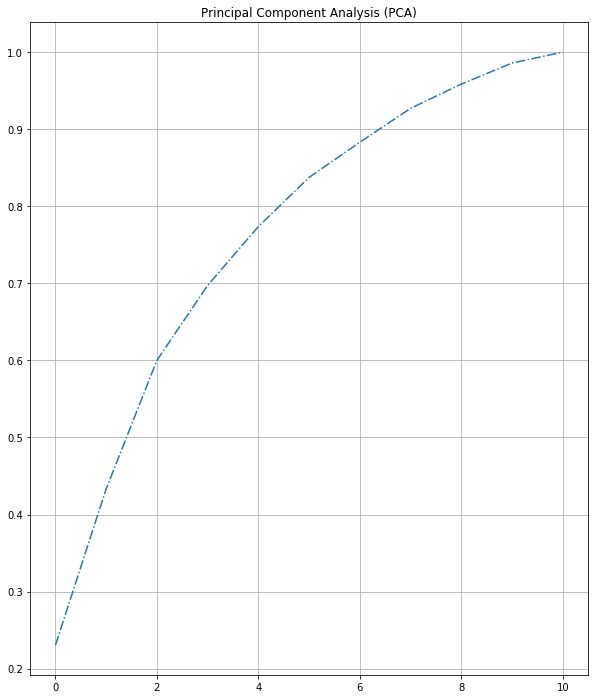

In [288]:
# Graficamos para encontrar los principales componentes
plt.figure(figsize=(10,12))
plt.plot(np.cumsum(component.explained_variance_ratio_), '-.')
plt.title("Principal Component Analysis (PCA)")
plt.grid()


**Comentarios**: Como se puede ver en el gráfico obtenido, todos los componentes aportan valor, no obstante hay 8 de ellos que contribuyen al 90% de la variación de los datos. 

In [0]:
# Elegiremos los primeros 8 componentes para nuestra predicción
component_new = PCA(n_components=8)
x_new = component_new.fit_transform(X_test)

In [0]:
### Los principales componentes #

In [280]:
# comprobamos los resultados
print(x_new)

[[-0.01031445 -0.71397393 -0.49575586 ...  0.35712678  0.70609523
  -0.94495313]
 [-1.10840193 -1.26226274  0.8304654  ...  0.13336474  0.27592237
   0.07424593]
 [ 1.24554235 -1.04386487 -0.79286777 ... -1.20624652 -0.61704359
  -0.70329803]
 ...
 [-0.16577063 -0.9347263  -1.13220458 ...  1.37964534  0.0632857
  -0.05957994]
 [ 1.33147003  1.20682656 -0.02772343 ...  0.70659167  0.34346809
   0.1801763 ]
 [-1.84856735 -1.5262699  -2.10698899 ...  0.05662039 -0.64992871
   0.21812915]]


#### De ahora en adelante, usaramos solo estas 8 variables y eliminaremos las variables menos importantes del modelo.

Dividiremos nuevamente nuestro dataset:

In [0]:
# Dividimos el dataset en 2 partes: train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 42)